In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images (pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Class labels
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train_encoded, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(x_test, y_test_encoded))

# Save the trained model
model.save('cifar10_cnn_model.h5')
print("Model saved as 'cifar10_cnn_model.h5'.")

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc * 100:.2f}%")


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [11]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
# Normalize the images (pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
# One-hot encode the labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [15]:
# Class labels
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [16]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

C:\Users\mayur\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model
history = model.fit(x_train, y_train_encoded, 
                    epochs=30, 
                    batch_size=64, 
                    validation_data=(x_test, y_test_encoded))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3216 - loss: 1.8174 - val_accuracy: 0.5545 - val_loss: 1.2468
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5465 - loss: 1.2620 - val_accuracy: 0.6246 - val_loss: 1.0716
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6242 - loss: 1.0706 - val_accuracy: 0.6379 - val_loss: 1.0288
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6672 - loss: 0.9408 - val_accuracy: 0.6699 - val_loss: 0.9371
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7043 - loss: 0.8463 - val_accuracy: 0.6982 - val_loss: 0.8628
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7282 - loss: 0.7729 - val_accuracy: 0.7063 - val_loss: 0.8411
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7492 - loss: 0.7184 - val_accuracy: 0.7188 - val_loss: 0.8181
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7715 - loss: 0.6598 - 

In [27]:
# Save the trained model
model.save('cifar10_cnn_model.h5')
print("Model saved as 'cifar10_cnn_model.h5'.")

Model saved as 'cifar10_cnn_model.h5'.


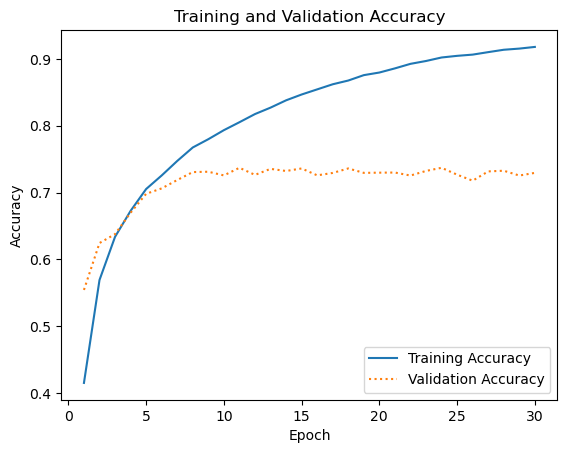

In [29]:
# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7367 - loss: 1.1599
Test accuracy: 72.95%


In [35]:
# Import the necessary module
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cifar10_cnn_model.h5')
print("Model loaded successfully.")

Model loaded successfully.


In [37]:
# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [39]:
# Normalize the test images
x_test = x_test / 255.0

In [41]:

# Class labels for CIFAR-10
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [43]:
# Perform predictions on the test set
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [56]:
def show_predictions(images, true_labels, predictions, class_labels, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        # Get true and predicted labels
        true_label = class_labels[true_labels[i][0]]
        predicted_label = class_labels[np.argmax(predictions[i])]

        # Display labels
        color = 'green' if true_label == predicted_label else 'red'
        plt.xlabel(f"True: {true_label}\nPred: {predicted_label}", color=color)

    # Ensure proper layout of subplots
    plt.tight_layout()
    plt.show()


In [58]:
# Evaluate the model's performance on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)